# Distances in the C-space
In this seminar we will practice some of the concepts discussed in L03

## Distance for orientations
Angles are the way to express orientations in 2D, that means, for any object that has dimensions, there is going to be an orientation variable that expresses their state.

We will start with angles, since this is also one of the easiest manifolds to study. We started presenting angles as elements of the 1-spherical group $\mathbb{S} = \{ (x,y) \in \mathbb{R}^2 | x^2+y^2=1\}$.

Our first task is to play around with distances here, below is provided some code for visualization.

Remark: angles are defined in radians.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_segment(s, color_):

    """
        Plots a segment in current figures
    """

    plt.plot(s[:,0], s[:,1] , linewidth=2, color=color_)
    plt.plot(s[1,0], s[1,1], marker='o', color=color_)
    plt.plot(s[0,0], s[0,1], marker='o', color=color_)

def plot_angles(angle1, angle2):

    """
        Plots a pair of angles in the S group
    """

    plt.figure(figsize=(9, 9))
    n = 50
    circle = np.zeros((2, n))
    for i in range(n):
        theta = i / (n - 1) * 2 * np.pi
        x, y = np.cos(theta), np.sin(theta)
        circle[:, i] = [x, y]
    plt.plot(circle[0,:], circle[1,:])
    segment1 = np.array([[0,0],
                         [np.cos(angle1), np.sin(angle1)]])
    color = np.array([1,0,0])
    plot_segment(segment1, color)
    segment2 = np.array([[0,0],
                         [np.cos(angle2), np.sin(angle2)]])
    color = np.array([0,1,0])
    plot_segment(segment2, color)
    plt.show()

def wrap_angle(angle):
    
    """
        Angle should be determined unambiguously.

        Wraps the given angle to the range [-pi, +pi].

        :param angle: The angle (in rad) to wrap (can be unbounded).
        :return: The wrapped angle (guaranteed to in [-pi, +pi]).
    """

    pi2 = 2 * np.pi

    while angle < -np.pi:
        angle += pi2

    while angle >= np.pi:
        angle -= pi2

    return angle


### Task 1: plot some random pair of configurations and calculate the raw and proper angle distances between angles. 

For comparison, calculate the raw and proper angle distances and visualize their values as elements of $\mathbb{S}$. Interesting points around 3, 6, -6, etc.

Hint. For the proper distance between angles, it should lie in the interval [-pi,pi] so use properly the function wrap written above.

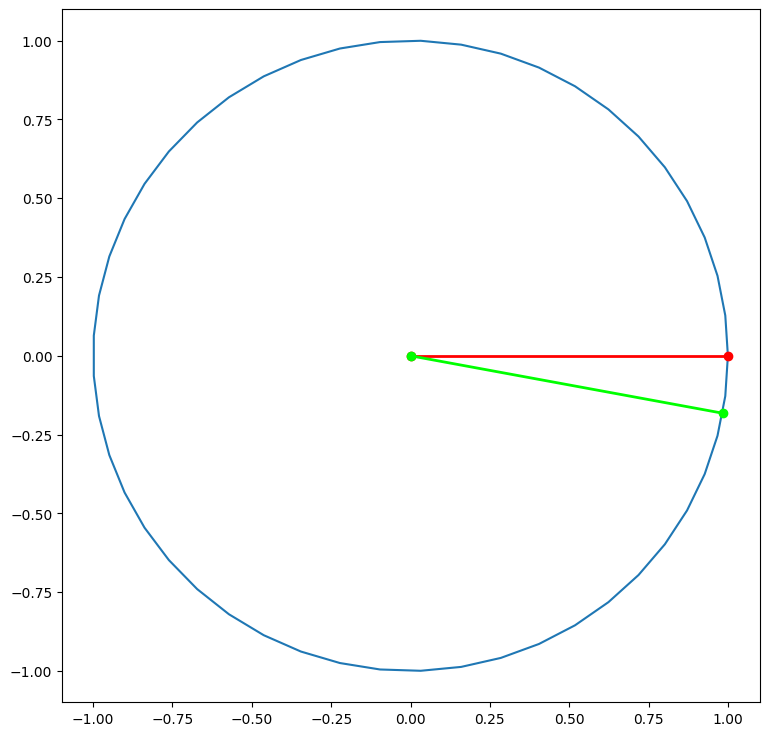

Raw angle distance : 6.1
True distance: 0.1831853071795866


In [3]:
angle1, angle2 = 0.0, 6.1  # 1: red, 2: green
plot_angles(angle1, angle2)
print(f"Raw angle distance : {np.abs(angle1 - angle2)}")
def wrap(angle):
    while angle > np.pi:
        angle -= 2 * np.pi
    while angle < -np.pi:
        angle += 2 * np.pi
    return np.abs(angle)
print(f"True distance: {wrap(angle1 - angle2)}")

### Task 2: let's fix one of the angles and range the values of the another one
Plot the figure of raw and proper angle distances, where fixed angle $\theta_1 = 0$.

$f(\theta_2) = d(\theta_1,\theta_2), \quad \theta_2 \in [-10,10]$

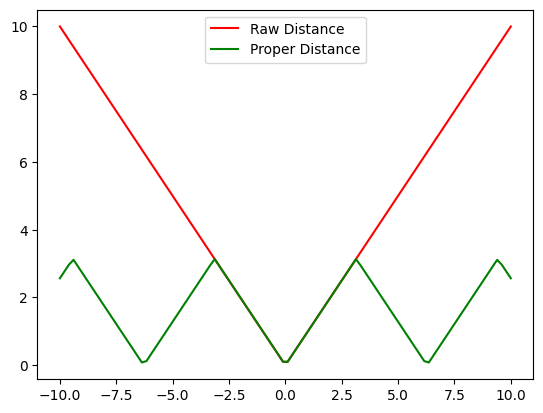

In [17]:
theta2_values = np.linspace(-10, 10,100)
theta_1 = 0
raw_distances = np.abs(theta2_values - theta_1)
wrapped_distances = np.array([wrap(theta2 - theta_1) for theta2 in theta2_values])
plt.plot(theta2_values, raw_distances, label="Raw Distance", color="red")
plt.plot(theta2_values, wrapped_distances, label="Proper Distance", color="green")
plt.legend()
plt.show()

### (optional topic) There is an alternative to describe angles: $SO(2)$

$SO(2)$ are the group of rotations in 2D. More formally: $SO(2) = \{R \in \mathbb{R}^{2\times 2} | R\cdot R^{\top} = I, \text{det}(R) = 1 \}$.

For this, we know that only a single variable is required to determine all possible rotation matrices:

$$
R(\theta) = \begin{bmatrix}
  \cos (\theta) & - \sin (\theta )\\
  \sin ( \theta)  &  \cos ( \theta)
\end{bmatrix}
$$

Distances can be defined in terms of rotation matrices, and the result is exactly the same as wraping. So, for 2D, it does not make sense but for 3D it could be a very useful tool for representing rotations and measuring distances:

$$d(\theta_1,\theta_2) = d(R_1,R_2) = || \text{Log}(R_1 \cdot R_2^{\top})||$$

where the $\text{Log}()$ function can be understand as an inverse mapping from the rotation matrix to a single variable, the angle.


In [19]:
def R(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
def inverse(R: np.ndarray):
    return np.atan(R[1,0]/R[0,0])
R_1 = R(0.1)
R_2 = R(6.2)
dist = np.linalg.norm(inverse(R_1 @ R_2.T))
dist

np.float64(0.18318530717958628)

### Task 3: Distance of 2D poses
For this task, we define 2d poses as a combination of position $p$ and orientation $q = [x,y,\theta]^{\top} \in \mathbb{R}^2\times \mathbb{S}$.

The first task is to construct a distance function for any two configurations. Use the visualization tools for ploting.

For a more comprehensive explanation on 2D poses, you can take a look at the lecture 5 in the course Perception in Robotics, class notes and the seminar work.

In [20]:
def plot_2d_poses(q1,q2):
    """given two configurations q1, q2, the function plots the poses of 2D objects"""
    triangle = np.array([[-1,-1],
                         [-1,1],
                         [1.5,0]])
    plt.figure(figsize=(9, 9))
    color = np.array([1,0,0])
    # Transform first object to the world coordinates
    triangle1 = np.zeros((3,2))
    for i in range(3):
        triangle1[i,:] = transform_point(q1,triangle[i,:])
    plot_segment(triangle1[[0,1],:], color)
    plot_segment(triangle1[[0,2],:], color)
    plot_segment(triangle1[[1,2],:], color)
    plt.plot(q1[0], q1[1], markersize=15, marker='*', color=color)
    
    # Transform second object to the world coordinates
    triangle2 = np.zeros((3,2))
    for i in range(3):
        triangle2[i,:] = transform_point(q2,triangle[i,:])
    color = np.array([0,1,0])
    plot_segment(triangle2[[0,1],:], color)
    plot_segment(triangle2[[0,2],:], color)
    plot_segment(triangle2[[1,2],:], color)
    plt.plot(q2[0], q2[1], markersize=15, marker='*', color=color)
    #plt.plot(triangle2[0,0], triangle2[0,1], markersize=15, marker='*', color=color)
    plt.axis('equal')
    plt.show()
    

def c(t):
    return np.cos(t)

def s(t):
    return np.sin(t)

def SE2(q):
    x, y, t = q
    T = np.array([
        [c(t), -s(t), x],
        [s(t), c(t), y],
        [0, 0, 1]])
    return T

def transform_point(q,p):
    """Given a pose q = [x,y,theta] and a point p = [x,y], it transforms 
    according to p' = R(theta)p + t. This is a rigid body transformation in 2D"""
    T = SE2(q)
    p_homogeneous = np.array([p[0],p[1],1])
    p_new = T @ p_homogeneous
    return p_new[:2]

### Play around with different configuration and propose a distance metric
There is not right answer here, define a new metric for measuring distances between the 2 objects

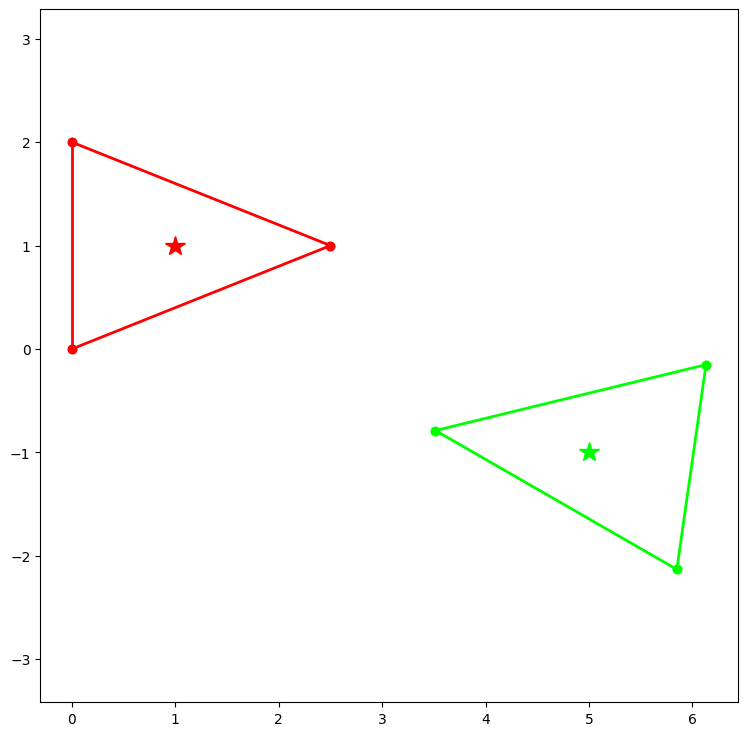

Distance between poses: 7.47213595499958


In [33]:
def pose_distance(q1: np.ndarray, q2: np.ndarray, c: float = 1.0):
    return np.linalg.norm(q1[:2] - q2[:2]) + c * wrap(q1[2] - q2[2])

q1 = np.array([1,1,0]) # red
q2 = np.array([5,-1,3]) # green
plot_2d_poses(q1,q2)

distance = pose_distance(q1, q2, c=1.0)
print(f"Distance between poses: {distance}")

### Task 5: 2R manipulator
The 2R manipulator consist of 2 revolute joints. Here, the configuration space is $q = [\theta_1, \theta_2] \in \mathbb{S}\times \mathbb{S}$.

Use the utilities provided below to visualize different configurations while defining different distance functions:

 * Distance between joint values
 * Weighted distance between joint values
 * Distance of the end effector in workspace
 * Other alternatives

In [34]:
def plot_2R(q, color):
    """Plots the 2R manipulator, a kinematic chain of 2 bars of length 1"""
    # segment 1:
    seg = np.zeros((3,2))
    a1,a2 = q
    T1 = SE2(np.array([0,0,a1])) # this is the first joint, a simple rotation
    T2 = SE2(np.array([1,0,a2])) # the second joint, it is a bar of d =1, plus a rotation for the second joint
    T3 = SE2(np.array([1,0,0]))  # this is simply to express the lenght of the second bar, no rotation required
    p = T1 @ T2 @ np.array([0,0,1])
    seg[1,:] = p[:2]
    p = T1 @ T2 @ T3 @ np.array([0,0,1])
    seg[2,:] = p[:2]
    plot_segment(seg[[0,1],:], color)
    plot_segment(seg[[1,2],:], color)
    plt.axis('equal')
    return seg[1,:], seg[2,:]

def plot_pair_2R(q1,q2):
    """Plot a pair of 2R configurations"""
    c = np.array([1,0,0])
    plot_2R(q1,c)
    c = np.array([0,1,0])
    plot_2R(q2,c)
    plt.axis('equal')
    plt.show()

[1. 0.] [2. 0.]


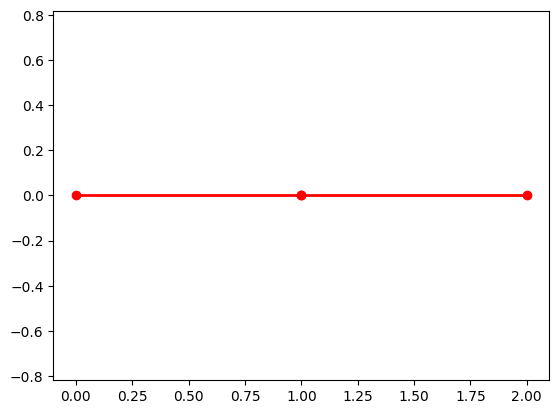

In [39]:
color = np.array([1,0,0])
p1,p2 = plot_2R(np.array([0.0,0.0]),color)
print(p1,p2)

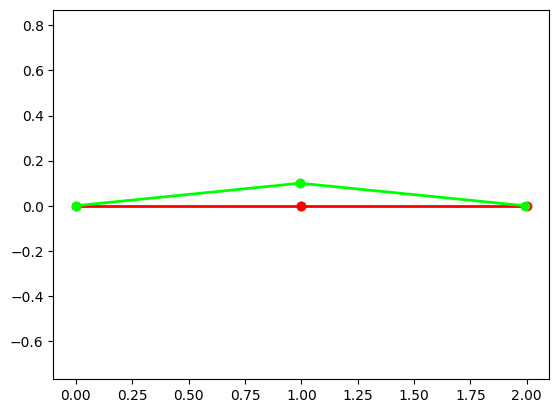

In [77]:
q1 = np.array([0.0,0]) # red
q2 = np.array([0.1,-0.2]) # green
plot_pair_2R(q1,q2)

### Distance between joint values

In [78]:
def joint_distance(q1, q2):
    return np.linalg.norm(q1-q2,1)
# print(f"Distance between joint values: {wrap(q1[0]-q2[0]),wrap(q1[1]-q2[1])}")
print(f"Distance between joint values: {joint_distance(q1,q2)}")

Distance between joint values: 0.30000000000000004


### Weighted distance between joint values

In [79]:
def weight_distance(q1,q2, c1 = 1.0, c2 = 2.0):
    return np.sqrt(c1 * (q1[0] - q2[0])**2 + c2 * (q1[1] - q2[1])**2 )
print(f"Weight distance: {weight_distance(q1,q2)}")

Weight distance: 0.30000000000000004


### Distance of the end effector in workspace

Distance of the end effector in workspace: 0.009991669443948359


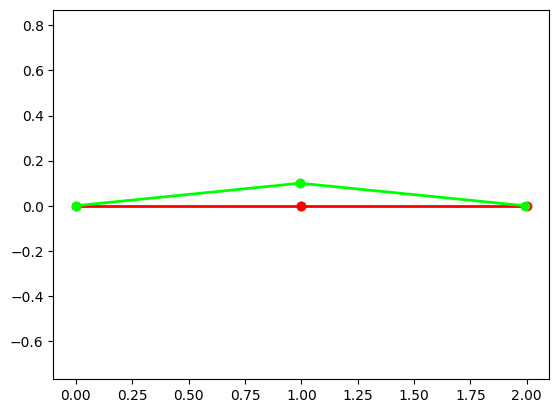

In [80]:
def end_effector(q1,q2):
    _, p1_end = plot_2R(q1, color=[1, 0, 0])
    _, p2_end = plot_2R(q2, color=[0, 1, 0])
    return np.linalg.norm(p1_end-p2_end)
print(f"Distance of the end effector in workspace: {end_effector(q1,q2)}")